In [1]:
!mkdir RU
!mkdir ES
!rm -rf sample_data

mkdir: cannot create directory ‘RU’: File exists
mkdir: cannot create directory ‘ES’: File exists


In [2]:
# Preprocessing
# Convert files to readable string list 
def get_all_text_tags(filename):
  with open(filename,'r') as f:
    text = f.readlines()

  all_text_tags = []

  # outputs a list of with 0th element as natural language word(x), 1st element as tag (O,B-Positive,...)(y)
  for i in text:
    new_text = i.replace("\n","") # remove trailing characters \n

    if new_text == ". .. O": # Handles the . .. issue for the russian training set. Need to find a better way to do this.
      inner_list = ['. ..', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ... O":
      inner_list = ['. ...', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ..":
      inner_list = ['. ..']
      all_text_tags.append(inner_list)
    elif new_text ==". ...":
      inner_list = ['. ...']
      all_text_tags.append(inner_list)
    else:
      inner_list = new_text.split(' ')
      all_text_tags.append(inner_list)
    

  return all_text_tags

RU_all_text_tags = get_all_text_tags('./RU/train')
ES_all_text_tags = get_all_text_tags('./ES/train')

# This function returns all the sentences and corresponding tags for the words in the sentence
# We will require both of these values in our algorithm

def get_sentences(all_text_tags):
  inner_sentence = []
  inner_tags = []
  all_sentences = []
  all_tags = []
  for text_tags in all_text_tags:
    if text_tags[0] == '':
      all_sentences.append(inner_sentence)
      all_tags.append(inner_tags)
      inner_sentence = []
      inner_tags = []
    else:
      inner_sentence.append(text_tags[0])
      try:
        inner_tags.append(text_tags[1])
      except:
        continue

  return all_sentences, all_tags


# We convert the tags lists to only tags, including START and STOP states
# def get_all_tags_only(all_text_tags):
#   only_tags = ['START']
#   for text_tag in all_text_tags:
#     if text_tag[0] == '':
#       only_tags.append('STOP')
#       only_tags.append('START')
#       continue
#     only_tags.append(text_tag[1])
#   only_tags.append('STOP')
#   return only_tags

# def get_all_words_only(all_text_words):
#   only_words = []
#   for text_word in all_text_words:
#     if text_word[0] == '':
#       continue
#     only_words.append(text_word[0])
#   return only_words


# def get_tag_count(only_tags):
#   tag_counts = {}
#   for i in only_tags:
#     tag_counts[i] = tag_counts.get(i, 0) + 1

#   return tag_counts


def get_tag_count(tags_sentence):
  tags_count = {'START':0 ,'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}
  for sentence in tags_sentence:
    tags_count['START'] +=1
    for tag in sentence:
      tags_count[tag] += 1
      
  return tags_count
        


# Create a FULL length of a word dictionary for each word
# Store what comes AFTER the word
# def create_tag_dictionary(only_tags):
#   tags_dict = {}
#   for tag in only_tags:
#     if tag == 'STOP':
#       continue
#     tags_dict[tag] = {}

#   for i in range(len(only_tags)):
#     if only_tags[i] == 'STOP':
#       continue
#     current_dict = tags_dict[only_tags[i]]
#     if i == len(only_tags) - 1:
#       break
#     if only_tags[i + 1] not in current_dict: 
#       current_dict[only_tags[i + 1]] = 1
#     else: 
#       current_dict[only_tags[i + 1]] +=1
#     tags_dict[only_tags[i]] = current_dict
#   return tags_dict


def create_tag_dictionary(tags_sentences):
  # print(tags_sentences)
  tags_dict = {'START': {}, 'O': {}, 'B-neutral' : {} ,'B-positive' : {},'B-negative' : {},'I-neutral' : {} ,'I-positive': {},'I-negative': {}}
  sub_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0, 'STOP': 0} # next tag
  for keys in tags_dict.keys():
    tags_dict[keys] = sub_dict.copy()
  count = 0
  for sentence in tags_sentences:
    if len(sentence) == 1:            #special case
      if sentence[0] == 'O':
        count+=1
      tags_dict['START'][sentence[0]] += 1
      tags_dict[sentence[0]]['STOP'] += 1 
    else:
      for i in range(len(sentence)):
        if sentence[i] == 'O':
          count+=1
        if i == 0:
          tags_dict['START'][sentence[i]] += 1        #add the first word
        elif i == len(sentence) - 1:
          tags_dict[sentence[i-1]][sentence[i]] += 1  #add the word that comes before it
          tags_dict[sentence[i]]['STOP'] += 1        #add the stop after it as well.
        else:
          tags_dict[sentence[i-1]][sentence[i]] += 1
  print('O',count)
  return tags_dict


RU_sentences, RU_tags_sentence = get_sentences(RU_all_text_tags)
# RU_only_words = get_all_words_only(RU_all_text_tags)
# RU_only_tags = get_all_tags_only(RU_all_text_tags)
RU_tags_count = get_tag_count(RU_tags_sentence)
RU_tags_dictionary = create_tag_dictionary(RU_tags_sentence)



ES_sentences, ES_tags_sentence = get_sentences(ES_all_text_tags)
# ES_only_words = get_all_words_only(ES_all_text_tags)
# ES_only_tags = get_all_tags_only(ES_all_text_tags)
ES_tags_count = get_tag_count(ES_tags_sentence)
ES_tags_dictionary = create_tag_dictionary(ES_tags_sentence)

# print(RU_sentences)
# print(RU_tags_dictionary)
# for keys in RU_tags_dictionary.keys():
#   print(f"{keys}",sum(RU_tags_dictionary[keys].values()))
# print(RU_tags_count)


# print(len(ES_sentences))
# print(ES_tags_dictionary)
# for keys in ES_tags_dictionary.keys():
#   print(f"{keys}",sum(ES_tags_dictionary[keys].values()))
# print(ES_tags_count)

O 44640
O 31627


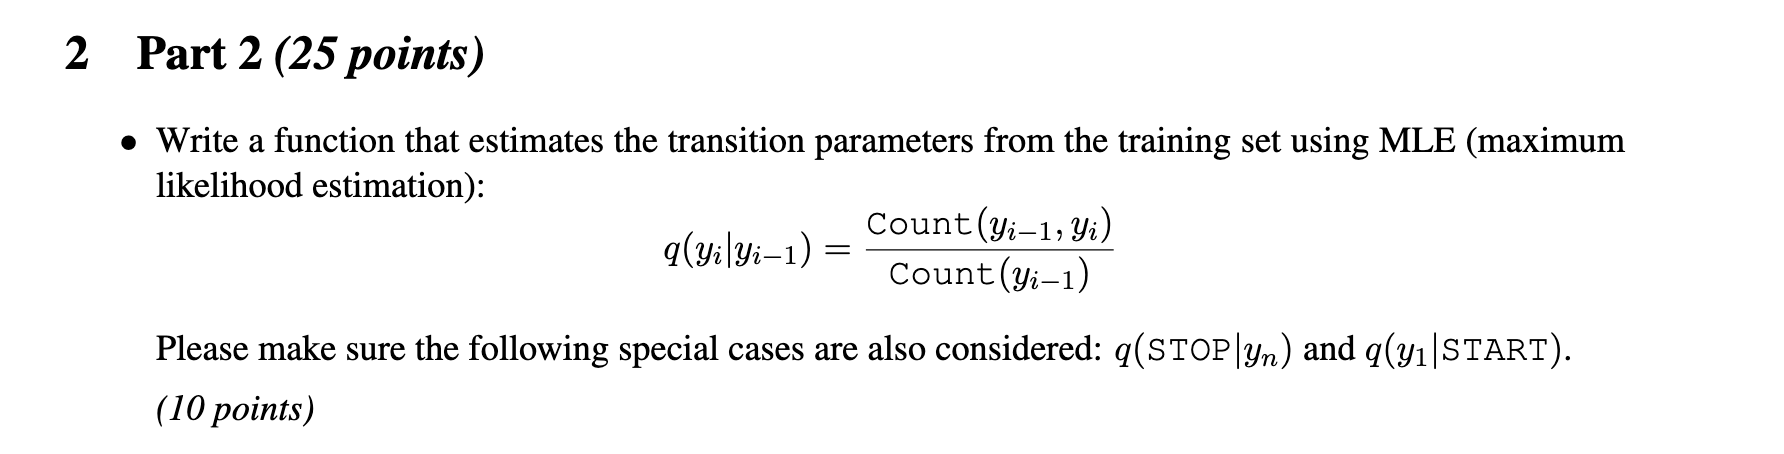

In [3]:
# 2a 
# args : wj, wj-1, dictionary we checking, word count we are checking
def transition_MLE(current_tag,previous_tag,tags_dict,tags_count):
  try:
    return tags_dict[previous_tag][current_tag] / tags_count[previous_tag]
  except:
    return 0.0


print(transition_MLE('B-positive','O',RU_tags_dictionary,RU_tags_count))
print(transition_MLE('STOP','O',RU_tags_dictionary,RU_tags_count))
print(transition_MLE('O','START',ES_tags_dictionary,ES_tags_count)) 

0.03888888888888889
0.07618727598566308
0.9288135593220339


## Preprocessing from previous question

In [4]:
## Copied from previous question
# Preprocessing

tags_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}

def create_words_tag_dict(all_text_tags):
  words_tag_dict = {}
  new_tags_dict = tags_dict.copy()

  # add all words and their emission outputs to words_tag_dict
  # loop through all_words
  # then loop through all_text_tags to count the number of emissions from a certain word.
  # reset the dictionary for each word.
  for word in all_text_tags:
    if word[0] == '':
      continue
    words_tag_dict[word[0]] = tags_dict.copy()

  for i in range(len(all_text_tags)):
    if len(all_text_tags[i]) < 2:
      continue
    words_tag_dict[all_text_tags[i][0]][all_text_tags[i][1]] += 1

  return words_tag_dict

RU_words_tag_dict = create_words_tag_dict(RU_all_text_tags)
ES_words_tag_dict = create_words_tag_dict(ES_all_text_tags)


# for test have to loop through the test set and find the words not in words_tag_dict
def new_emission_MLE(x,y,words_tag_dict,tags_count,k=1):
  if x in words_tag_dict:
    return words_tag_dict[x][y] / (tags_count[y]+k)
  else:
    return k/(tags_count[y]+k)

print(new_emission_MLE('.','O',RU_words_tag_dict,RU_tags_count))

0.05918326202370019


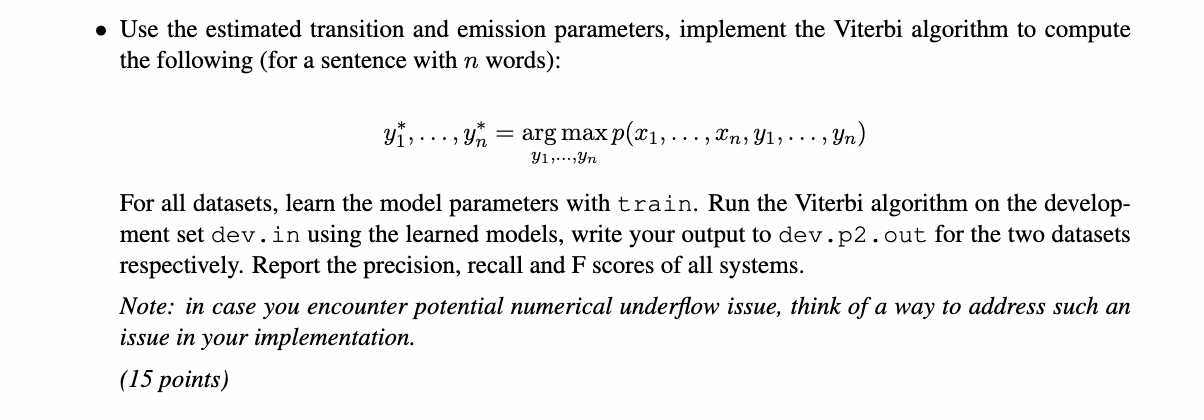

In [5]:
# 2b

# obs = ("normal", "cold", "dizzy")
# states = ("Healthy", "Fever")
# start_p = {"Healthy": 0.6, "Fever": 0.4}
# trans_p = {
#     "Healthy": {"Healthy": 0.7, "Fever": 0.3},
#     "Fever": {"Healthy": 0.4, "Fever": 0.6},
# }
# emit_p = {
#     "Healthy": {"normal": 0.5, "cold": 0.4, "dizzy": 0.1},
#     "Fever": {"normal": 0.1, "cold": 0.3, "dizzy": 0.6},
# }

def viterbi_sequence_prep(tags_count,tags_dict,words_tag_dict):
  tags = list(tags_dict.keys())
  tags.remove('START')

  start_p = {} # tags
  emit_p = {} # words
  trans_p = {} # tags

  # Here we are getting the starting probabilities to all tags from the training set
  #=====================================
  for tag in tags:
    start_p[tag] = transition_MLE(tag,'START',tags_dict,tags_count)
  #=====================================

  # Here we are getting the transmission probabilities to other tags from the training set
  #=====================================
    if tag not in trans_p:
      trans_p[tag] = {}
    for next_tag in tags_dict[tag]:
      trans_p[tag][next_tag] = transition_MLE(next_tag,tag,tags_dict,tags_count)
  #=====================================

  # Finally we get the emission probabilities of all the words from the training set
  #=====================================
    if tag not in emit_p:
      emit_p[tag] = {}
    for word in words_tag_dict:
      emit_p[tag][word] = new_emission_MLE(word,tag,words_tag_dict,tags_count)
  #=====================================

  return start_p,trans_p,emit_p
  
ES_start_p,ES_trans_p,ES_emit_p = viterbi_sequence_prep(ES_tags_count,ES_tags_dictionary,ES_words_tag_dict)
RU_start_p,RU_trans_p,RU_emit_p = viterbi_sequence_prep(RU_tags_count,RU_tags_dictionary,RU_words_tag_dict)

print(ES_trans_p)
print(ES_start_p)
print(ES_emit_p)

{'O': {'O': 0.8833907737060107, 'B-neutral': 0.0023397729787839505, 'B-positive': 0.03674075947766149, 'B-negative': 0.012710658614474974, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0, 'STOP': 0.06481803522306889}, 'B-neutral': {'O': 0.8117647058823529, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.18823529411764706, 'I-positive': 0.0, 'I-negative': 0.0, 'STOP': 0.0}, 'B-positive': {'O': 0.8634222919937206, 'B-neutral': 0.0007849293563579278, 'B-positive': 0.0015698587127158557, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.1271585557299843, 'I-negative': 0.0, 'STOP': 0.00706436420722135}, 'B-negative': {'O': 0.8088578088578089, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.18181818181818182, 'STOP': 0.009324009324009324}, 'I-neutral': {'O': 0.36363636363636365, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.6363636363636364, 'I-positive': 0.0, 'I-negative': 

In [6]:
for keys in ES_trans_p.keys():
  #print(ES_trans_p[keys])
  print(f"Sum of all values in {keys} = {sum(ES_trans_p[keys].values())}")
for keys in ES_emit_p.keys():
  #print(ES_emit_p[keys])
  print(f"Sum of all values in {keys} = {sum(ES_emit_p[keys].values())}")

Sum of all values in O = 1.0
Sum of all values in B-neutral = 1.0
Sum of all values in B-positive = 0.9999999999999999
Sum of all values in B-negative = 1.0
Sum of all values in I-neutral = 1.0
Sum of all values in I-positive = 1.0
Sum of all values in I-negative = 1.0
Sum of all values in O = 0.9999683824458399
Sum of all values in B-neutral = 0.9883720930232567
Sum of all values in B-positive = 0.9992156862745024
Sum of all values in B-negative = 0.9976744186046571
Sum of all values in I-neutral = 0.9777777777777782
Sum of all values in I-positive = 0.9975062344139598
Sum of all values in I-negative = 0.9956521739130403


In [7]:
import math

# To fix the underflow issue. Ensures the accumulation of the sum of log probabilities without errors.
def log(a, b=1, c=1): # can take up to 3 inputs and sums up their log forms.
  if not a or not b or not c:
    return None
  if a > 0:
    a = math.log(a)
  if b > 0:
    b = math.log(b)
  if c > 0:
    c = math.log(c)
  return a + b + c


In [8]:
# # Stored sequence into each word to handle what comes before
# # Probabilities are stored as log values to prevent underflow.

# # SOLUTION 1: Run new_emission_MLE formula as long as emit_p is 0. (DOESN'T WORK, ALL BECOMES I-NEUTRAL)

# def new_emission_MLE(x,y,words_tag_dict,tags_count,k=1):
#   if x in words_tag_dict:
#     e_p =  words_tag_dict[x][y] / (tags_count[y]+k)
#     if e_p == 0.0:
#       e_p = k/(tags_count[y]+k)
#   else:
#     e_p =  k/(tags_count[y]+k)
#   return e_p


#   #=====================================
# def emit_p_prep(tags_count,tags_dict,words_tag_dict):
#   tags = list(tags_dict.keys())
#   tags.remove('START')
#   emit_p = {}
#   for tag in tags:
#     if tag not in emit_p:
#       emit_p[tag] = {}
#     for word in words_tag_dict:
#       emit_p[tag][word] = new_emission_MLE(word,tag,words_tag_dict,tags_count)
#   #=====================================

# ES_emit_p = emit_p_prep(ES_tags_count,ES_tags_dictionary,ES_words_tag_dict)
# RU_emit_p = emit_p_prep(RU_tags_count,RU_tags_dictionary,RU_words_tag_dict)


# def viterbi_2(input,start_p,trans_p,emit_p,tags_dictionary,tags_count):
#   states = list(tags_dictionary.keys())
#   states.remove('START')

#   V = {}
#   # initialize "START" -> first word
#   V['0'] = {}
#   for state in states: # does not include 'START' and 'STOP'
#     try:
#       V['0'][state] = {'prob': log(start_p[state]*emit_p[state][input[0]]), 'seq': [state]}
#     except:
#       V['0'][state] = {'prob': log(start_p[state]*new_emission_MLE(input[0],state,tags_dictionary,tags_count)), 'seq': [state]}
#   for i in range(1,len(input)):
#     prev = str(i-1)
#     V[str(i)] = {}

#     for state in states: # Loop through the current layer
#       max_prob_for_this_state = None # Define the max probability for this state
#       best_seq_for_this_state = None
#       for prev_state in states: # Loop through the previous layer to get the best probability
#         prev_prob = V[prev][prev_state]['prob']
#         t_p = trans_p[prev_state][state]
#         try:
#           e_p = emit_p[state][input[i]]
#         except:
#           e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
        
#         # FORMULA TO CALCULATE PROBABILITY
#         # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
#         pi = log(prev_prob, t_p, e_p)

#         # Assigning the max probability for each of the states
#         if pi and not max_prob_for_this_state:
#           max_prob_for_this_state = pi
#           best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
#           best_seq_for_this_state.append(state)

#         if pi and max_prob_for_this_state:
#           if pi > max_prob_for_this_state:
#             max_prob_for_this_state = pi
#             best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
#             best_seq_for_this_state.append(state)

#       V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}


#   last_seq_dict = V[str(len(input)-1)]
#   max_prob = None
#   best_seq = None
#   for state in states:
#     current_prob = last_seq_dict[state]['prob']
#     if current_prob and not max_prob:
#       max_prob = current_prob
#       best_seq = last_seq_dict[state]['seq']
#     if current_prob and max_prob:
#       if current_prob > max_prob:
#         max_prob = current_prob
#         best_seq = last_seq_dict[state]['seq']

#   return V,best_seq,max_prob

In [9]:
# Stored sequence into each word to handle what comes before
# Probabilities are stored as log values to prevent underflow.

# Solution 2: save best sequence when pi is 0, take best prev_prob * trans_p if prob is 0, continue from there.

def viterbi_2(input,start_p,trans_p,emit_p,tags_dictionary,tags_count):
  states = list(tags_dictionary.keys())
  states.remove('START')

  V = {}
  # initialize "START" -> first word
  V['0'] = {}
  for state in states: # does not include 'START' and 'STOP'
    try:
      V['0'][state] = {'prob': log(start_p[state]*emit_p[state][input[0]]), 'seq': [state]}
    except KeyError as e:
      V['0'][state] = {'prob': log(start_p[state]*new_emission_MLE(input[0],state,tags_dictionary,tags_count)), 'seq': [state]}
  for i in range(1,len(input)):
    prev = str(i-1)
    V[str(i)] = {}
    count = 0 # to account for item not being NoneType
    for state in states: # Loop through the current layer
      
      max_prob_for_this_state = None # Define the max probability for this state
      best_seq_for_this_state = None
      for prev_state in states: # Loop through the previous layer to get the best probability
        prev_prob = V[prev][prev_state]['prob']
        t_p = trans_p[prev_state][state]
        try:
          e_p = emit_p[state][input[i]]
        except KeyError as e:
          e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
        
        # FORMULA TO CALCULATE PROBABILITY
        # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
        pi = log(prev_prob, t_p, e_p)

        # Assigning the max probability for each of the states
        if pi and not max_prob_for_this_state:
          max_prob_for_this_state = pi
          best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
          best_seq_for_this_state.append(state)

        if pi and max_prob_for_this_state:
          if pi > max_prob_for_this_state:
            max_prob_for_this_state = pi
            best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
            best_seq_for_this_state.append(state)

      V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}
      if max_prob_for_this_state or best_seq_for_this_state:
        count += 1

#============================
# If probability for a layer is 0, take pi = prev_prob * t_p
    if count == 0:
      for state in states: # Loop through the current layer
        max_prob_for_this_state = None # Define the max probability for this state
        best_seq_for_this_state = None
        for prev_state in states: # Loop through the previous layer to get the best probability
          prev_prob = V[prev][prev_state]['prob']
          t_p = trans_p[prev_state][state]
          # try:
          #   e_p = emit_p[state][input[i]]
          # except KeyError as e:
          #   e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
          
          # FORMULA TO CALCULATE PROBABILITY
          # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
          pi = log(prev_prob, t_p) # only take prev_prob * t_p

          # Assigning the max probability for each of the states
          if pi and not max_prob_for_this_state:
            max_prob_for_this_state = pi
            best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
            best_seq_for_this_state.append(state)

          if pi and max_prob_for_this_state:
            if pi > max_prob_for_this_state:
              max_prob_for_this_state = pi
              best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
              best_seq_for_this_state.append(state)

        V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}
        if max_prob_for_this_state or best_seq_for_this_state:
          count += 1
      if count == 0:
        print(i, input(i))
#============================


  last_seq_dict = V[str(len(input)-1)]
  max_prob = None
  best_seq = None
  for state in states:
    current_prob = last_seq_dict[state]['prob']
    if current_prob and not max_prob:
      max_prob = current_prob
      best_seq = last_seq_dict[state]['seq']
    if current_prob and max_prob:
      if current_prob > max_prob:
        max_prob = current_prob
        best_seq = last_seq_dict[state]['seq']

  return V,best_seq,max_prob

In [10]:
# Stored sequence into each word to handle what comes before
# Probabilities are stored as log values to prevent underflow.

# Solution 3: save best sequence when pi is 0, take best prev_prob * emit_p if prob is 0, continue from there.

def viterbi_2(input,start_p,trans_p,emit_p,tags_dictionary,tags_count):
  states = list(tags_dictionary.keys())
  states.remove('START')

  V = {}
  # initialize "START" -> first word
  V['0'] = {}
  for state in states: # does not include 'START' and 'STOP'
    try:
      V['0'][state] = {'prob': log(start_p[state]*emit_p[state][input[0]]), 'seq': [state]}
    except KeyError as e:
      V['0'][state] = {'prob': log(start_p[state]*new_emission_MLE(input[0],state,tags_dictionary,tags_count)), 'seq': [state]}
  for i in range(1,len(input)):
    prev = str(i-1)
    V[str(i)] = {}
    count = 0 # to account for item not being NoneType
    for state in states: # Loop through the current layer
      
      max_prob_for_this_state = None # Define the max probability for this state
      best_seq_for_this_state = None
      for prev_state in states: # Loop through the previous layer to get the best probability
        prev_prob = V[prev][prev_state]['prob']
        t_p = trans_p[prev_state][state]
        try:
          e_p = emit_p[state][input[i]]
        except KeyError as e:
          e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
        
        # FORMULA TO CALCULATE PROBABILITY
        # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
        pi = log(prev_prob, t_p, e_p)

        # Assigning the max probability for each of the states
        if pi and not max_prob_for_this_state:
          max_prob_for_this_state = pi
          best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
          best_seq_for_this_state.append(state)

        if pi and max_prob_for_this_state:
          if pi > max_prob_for_this_state:
            max_prob_for_this_state = pi
            best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
            best_seq_for_this_state.append(state)

      V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}
      if max_prob_for_this_state or best_seq_for_this_state:
        count += 1

#============================
# If probability for a layer is 0, take pi = prev_prob * e_p
    if count == 0:
      for state in states: # Loop through the current layer
        max_prob_for_this_state = None # Define the max probability for this state
        best_seq_for_this_state = None
        for prev_state in states: # Loop through the previous layer to get the best probability
          prev_prob = V[prev][prev_state]['prob']
          # t_p = trans_p[prev_state][state]
          try:
            e_p = emit_p[state][input[i]]
          except KeyError as e:
            e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
          
          # FORMULA TO CALCULATE PROBABILITY
          # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
          pi = log(prev_prob, e_p) # only take prev_prob * e_p

          # Assigning the max probability for each of the states
          if pi and not max_prob_for_this_state:
            max_prob_for_this_state = pi
            best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
            best_seq_for_this_state.append(state)

          if pi and max_prob_for_this_state:
            if pi > max_prob_for_this_state:
              max_prob_for_this_state = pi
              best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
              best_seq_for_this_state.append(state)

        V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}
        if max_prob_for_this_state or best_seq_for_this_state:
          count += 1
      if count == 0:
        print(i, input(i))
#============================


  last_seq_dict = V[str(len(input)-1)]
  max_prob = None
  best_seq = None
  for state in states:
    current_prob = last_seq_dict[state]['prob']
    if current_prob and not max_prob:
      max_prob = current_prob
      best_seq = last_seq_dict[state]['seq']
    if current_prob and max_prob:
      if current_prob > max_prob:
        max_prob = current_prob
        best_seq = last_seq_dict[state]['seq']

  return V,best_seq,max_prob

In [11]:
#viterbi(ES_test_input,ES_tags,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)

ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)
ES_all_seq = []
for sentence in ES_all_test_sentences[0]:
  ES_V,ES_sentence_seq, ES_max_prob = viterbi_2(sentence,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)
  if ES_sentence_seq == None:
    print(sentence)
    for i in ES_V:
      print(ES_V[i])
    print('\n')
  

  ES_all_seq.append(ES_sentence_seq)


RU_input = get_all_text_tags('./RU/dev.in')
RU_all_test_sentences = get_sentences(RU_input)
RU_all_seq = []
for sentence in RU_all_test_sentences[0]:
  RU_V,RU_sentence_seq, RU_max_prob = viterbi_2(sentence,RU_start_p,RU_trans_p,RU_emit_p,RU_tags_dictionary,RU_tags_count)
  if RU_sentence_seq == None:
    print(sentence)
    for i in RU_V:
      print(RU_V[i])
    print('\n')
  

  RU_all_seq.append(RU_sentence_seq)
print(RU_all_seq)

[['O', 'O', 'O', 'O', 'O', 'O', 'B-neutral', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'I-neutral', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O'], ['

In [12]:
def get_pred_p2(word_data,best_seq,output_file):
  all_string = ""
  for i in range(len(word_data)):
    for j in range(len(word_data[i])):
        all_string = all_string + word_data[i][j] + ' ' + best_seq[i][j] + '\n'
    all_string = all_string + '\n'
  
  with open(output_file,'w') as f:
    f.write(all_string)

def get_words_with_spaces(test_input_with_tags):
  all_sentences = []
  only_words_sentence = []
  for item in test_input_with_tags:
    if item[0] == '':
      all_sentences.append(only_words_sentence)
      only_words_sentence = []
    else:
      only_words_sentence.append(item[0])
  return all_sentences

ES_test_input_words = get_all_text_tags('./ES/dev.in')
RU_test_input_words = get_all_text_tags('./RU/dev.in')

ES_data = get_words_with_spaces(ES_test_input_words)
RU_data = get_words_with_spaces(RU_test_input_words)

get_pred_p2(ES_data,ES_all_seq,'./ES/dev.p2.out')
get_pred_p2(RU_data,RU_all_seq,'./RU/dev.p2.out')

In [13]:
# Evaluation for RU set

!python evalResult.py ./RU/dev.out ./RU/dev.p2.out


#Entity in gold data: 461
#Entity in prediction: 540

#Correct Entity : 220
Entity  precision: 0.4074
Entity  recall: 0.4772
Entity  F: 0.4396

#Correct Sentiment : 144
Sentiment  precision: 0.2667
Sentiment  recall: 0.3124
Sentiment  F: 0.2877


In [14]:
# Evaluation for ES set

!python evalResult.py ./ES/dev.out ./ES/dev.p2.out


#Entity in gold data: 255
#Entity in prediction: 574

#Correct Entity : 132
Entity  precision: 0.2300
Entity  recall: 0.5176
Entity  F: 0.3185

#Correct Sentiment : 105
Sentiment  precision: 0.1829
Sentiment  recall: 0.4118
Sentiment  F: 0.2533
